In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import hashlib
from sklearn.cluster import KMeans

## 신청자들의 데이터를 입력 (Test 코드에서는 변수생성)

In [2]:
X = pd.DataFrame( [
                    ['A','염X진'],['A','이X준'],['A','박X원'],['A','김X형']
                   ,['B','박X철'],['B','양X빈'],['B','황X이'],['B','이X미']
                   ,['C','김X원'],['C','염X혁'],['C','이X지'],['C','혜X인']
                   ,['D','한X연'],['D','박X범'],['D','차X용'],['D','배X선']
                  ], columns=['팀','이름']
                )

## 글자를 숫자로 변환
### Hash 함수를 통해서 글자를 숫자로 변경하고 비슷한 이름과 팀명은 비슷하게 될수 있어
### 입력된 순서의 Index 값의 첫번째 자리수를 곱해 데이터 변질시킵니다.

In [3]:
tmp = []
for idx, a in X.iterrows():
    if idx%10 == 0 :
        var1=10
        var2=1
    else :
        var1 = idx%10
        var2 = 10 - idx%10
    tmp.append([int(hashlib.sha1(a[0].encode()).hexdigest(),16)*(var1)%(10 ** 6), int(hashlib.sha1(a[1].encode()).hexdigest(),16)*(var2)%(10 ** 6)])

X_encoded = pd.DataFrame(tmp, columns=['팀','이름'])
X_encoded

,팀,이름
0,968270,777287
1,796827,302981
2,593654,381824
3,390481,967270
4,605808,880598
5,7260,964080
6,408712,689060
7,810164,186945
8,43560,802136
9,924005,490587


### 만들어진 값들을 그래프로 표기

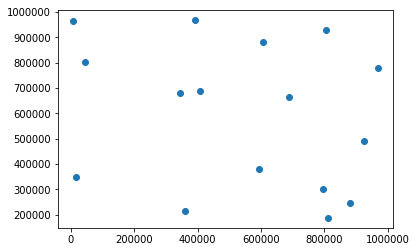

In [4]:
plt.scatter(X_encoded['팀'], X_encoded['이름'], label='True Position')

## Python Mechine Learning Library Sklearn KMeans 
### 비지도 학습 알고리즘인 KMeans 로 7개의 집단으로 분류

In [5]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(X_encoded)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### 각 집단의 중앙값(대표값) 확인

In [6]:
print(kmeans.cluster_centers_)

[[477504.5        297699.5       ]
 [498144.5        923934.        ]
 [ 16813.         348900.        ]
 [886360.         852512.5       ]
 [ 25410.         883108.        ]
 [852860.25       306681.5       ]
 [480779.33333333 676845.33333333]]


## 색깔별로 7개의 집단이 구분됨을 확인하다.
### 검정색은 집단의 대표값으로 가장 가까운 점의 사람이 당첨자입니다. ^^

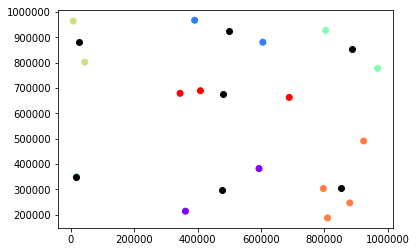

In [7]:
plt.scatter(X_encoded['팀'], X_encoded['이름'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')

In [8]:
kmeans.labels_

array([3, 5, 0, 1, 1, 4, 6, 5, 4, 5, 3, 5, 6, 2, 6, 0], dtype=int32)

In [9]:
distance = []
for idx in range(len(kmeans.cluster_centers_)):
    X_selected = X_encoded[kmeans.labels_ == idx]
    for idx2 in range(len(X_selected)):
        distance.append(int(np.sqrt((kmeans.cluster_centers_[idx][0] - X_selected.iloc[idx2, 0] )**2 + (kmeans.cluster_centers_[idx][1] -  X_selected.iloc[idx2, 1])**2))/10000)

Z = pd.concat([X, pd.DataFrame(kmeans.labels_, columns=['군집']), pd.DataFrame(distance, columns=['중앙값과의거리'])], axis=1)
Z = Z.sort_values(['군집', '중앙값과의거리'])
display(Z)

,팀,이름,군집,중앙값과의거리
2,A,박X원,0,11.6057
15,D,배X선,0,20.8786
4,B,박X철,1,0.0000
3,A,김X형,1,11.6057
13,D,박X범,2,7.3095
10,C,이X지,3,12.7121
0,A,염X진,3,14.3414
8,C,김X원,4,8.2981
5,B,양X빈,4,11.1212
9,C,염X혁,5,5.6155


In [10]:
Z.groupby(['군집']).first()

,팀,이름,중앙값과의거리
군집,,,
0,A,박X원,11.6057
1,B,박X철,0.0000
2,D,박X범,7.3095
3,C,이X지,12.7121
4,C,김X원,8.2981
5,C,염X혁,5.6155
6,D,한X연,6.6463
